<a href="https://www.kaggle.com/code/harish1106/maternal-risk-prediction?scriptVersionId=146228882" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("/kaggle/input/maternal-health-risk-data-set/Maternal_Risk.csv")
data.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk


In [3]:
data.shape

(808, 7)

In [4]:
data.dtypes

Age              int64
SystolicBP       int64
DiastolicBP      int64
BS             float64
BodyTemp       float64
HeartRate        int64
RiskLevel       object
dtype: object

In [5]:
data.describe()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
count,808.000000,808.000000,808.000000,808.000000,808.000000,808.000000
mean,30.585396,112.972772,77.500000,9.264839,98.640347,74.297030
std,13.922075,19.924312,14.772207,3.617635,1.386501,8.822686
min,10.000000,70.000000,49.000000,6.000000,98.000000,7.000000
25%,19.000000,90.000000,65.000000,7.000000,98.000000,70.000000
50%,27.000000,120.000000,80.000000,7.500000,98.000000,76.000000
75%,40.000000,120.000000,90.000000,11.000000,98.000000,80.000000
max,70.000000,160.000000,100.000000,19.000000,103.000000,90.000000


In [6]:
data.columns

Index(['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate',
       'RiskLevel'],
      dtype='object')

## Pre processing

In [7]:
print('Count of Null values')
data.isnull().sum()

Count of Null values


Age            0
SystolicBP     0
DiastolicBP    0
BS             0
BodyTemp       0
HeartRate      0
RiskLevel      0
dtype: int64

In [8]:
print('Count of unique values')
for i in data.columns:
    print(f'{i} : {len(data[i].unique())}')

Count of unique values
Age : 48
SystolicBP : 18
DiastolicBP : 16
BS : 29
BodyTemp : 8
HeartRate : 15
RiskLevel : 2


In [9]:
from sklearn.preprocessing import LabelEncoder
scaler = LabelEncoder()
df_label = data.copy()
df_label['RiskLevel'] = scaler.fit_transform(df_label['RiskLevel'])
corr = df_label.corr()

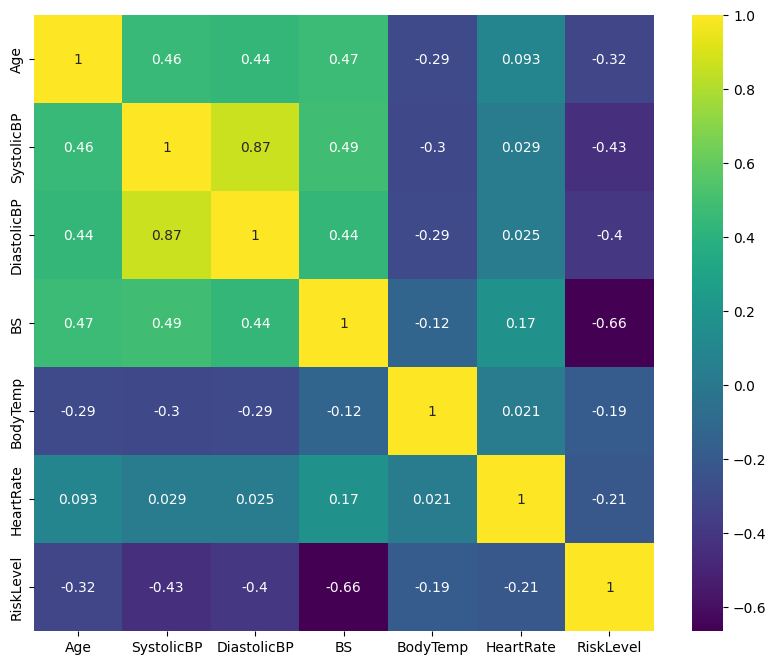

In [10]:
plt.figure(figsize = (10, 8))
sns.heatmap(corr , annot = True , cmap = 'viridis')
plt.show()

## Outlier Detection

<Axes: >

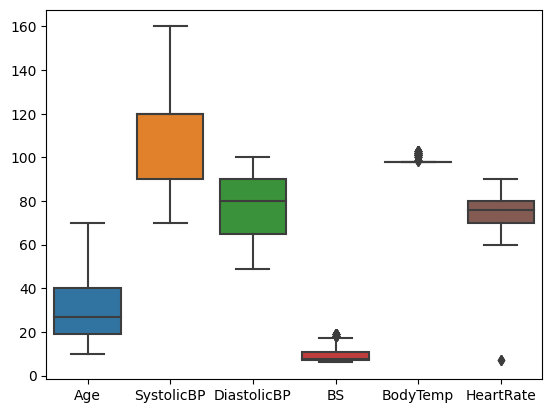

In [11]:
sns.boxplot(data.drop('RiskLevel' , axis = 1))

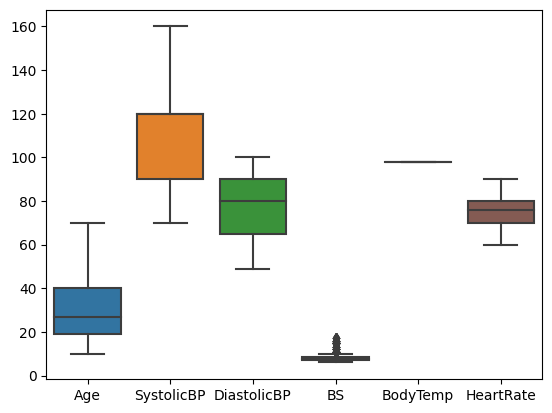

In [12]:
from sklearn.impute import SimpleImputer

train = data.drop('RiskLevel' , axis = 1)
def impute_outliers(data, column, factor):
    q1 = data[column].quantile(0.25)
    q3 = data[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - factor * iqr
    upper_bound = q3 + factor * iqr
    
    data_copy = data.copy()
    data_copy[column] = np.where(data_copy[column] < lower_bound, np.nan, data_copy[column])
    data_copy[column] = np.where(data_copy[column] > upper_bound, np.nan, data_copy[column])
    
    imputer = SimpleImputer(strategy="mean")
    data_imputed = imputer.fit_transform(data_copy)
    
    return pd.DataFrame(data_imputed, columns=data.columns)

for column in train.columns:
    train = impute_outliers(train, column, 1.5)

df = train
sns.boxplot(df)
plt.show()

In [13]:
print('Age less than 18:')
df['Age'].where(df['Age'] < 18).value_counts()

Age less than 18:


Age
15.0    66
17.0    59
12.0    27
16.0    13
13.0     7
14.0     3
10.0     2
Name: count, dtype: int64

In [14]:
print('Age less than 18:')
mean_age = df['Age'].mean()
df.loc[df['Age'] < 18, 'Age'] = mean_age
df['Age'].where(df['Age'] < 18).value_counts().sum()

Age less than 18:


0

In [15]:
df['RiskLevel'] = data['RiskLevel']
df.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25.0,130.0,80.0,15.0,98.0,86.0,high risk
1,35.0,140.0,90.0,13.0,98.0,70.0,high risk
2,29.0,90.0,70.0,8.0,98.0,80.0,high risk
3,30.0,140.0,85.0,7.0,98.0,70.0,high risk
4,35.0,120.0,60.0,6.1,98.0,76.0,low risk


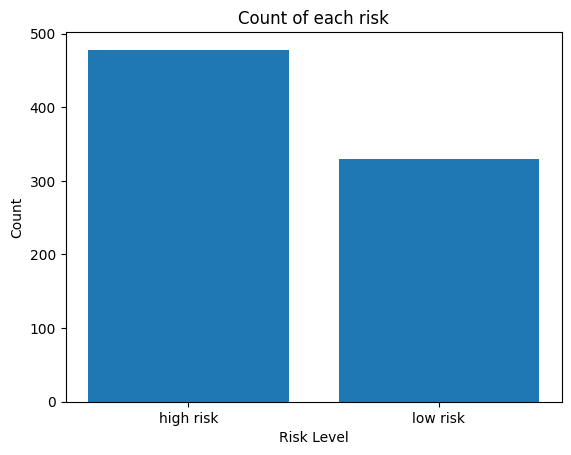

In [16]:
plt.bar(df['RiskLevel'].unique() , df['RiskLevel'].value_counts())
plt.xlabel('Risk Level')
plt.ylabel('Count')
plt.title('Count of each risk')
plt.show()

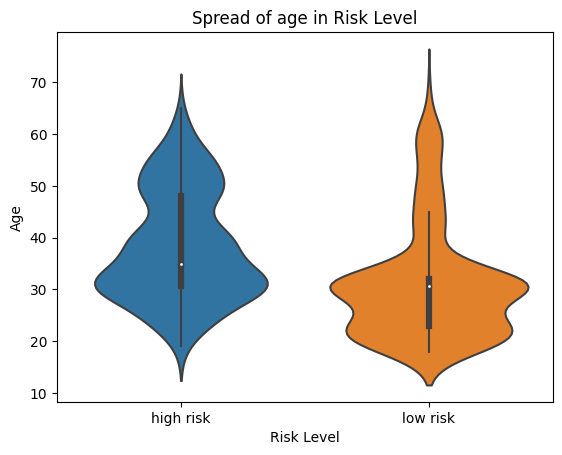

In [17]:
sns.violinplot(x="RiskLevel", y="Age", data=df)
plt.xlabel('Risk Level')
plt.ylabel('Age')
plt.title('Spread of age in Risk Level')
plt.show()

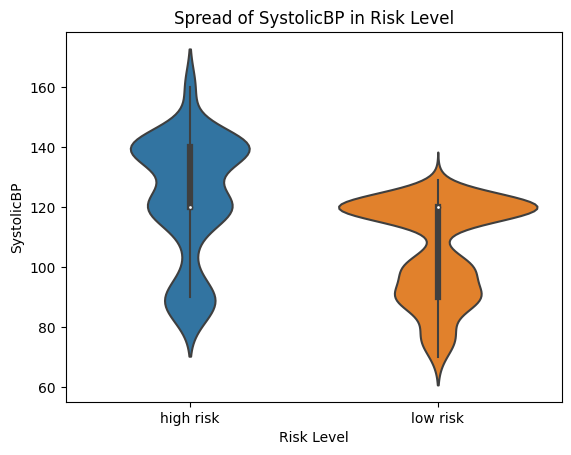

In [18]:
sns.violinplot(x="RiskLevel", y="SystolicBP", data=df)
plt.xlabel('Risk Level')
plt.ylabel('SystolicBP')
plt.title('Spread of SystolicBP in Risk Level')
plt.show()

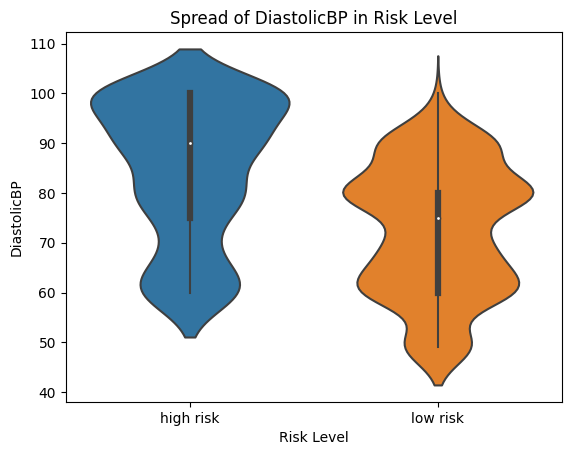

In [19]:
sns.violinplot(x="RiskLevel", y="DiastolicBP", data=df)
plt.xlabel('Risk Level')
plt.ylabel('DiastolicBP')
plt.title('Spread of DiastolicBP in Risk Level')
plt.show()

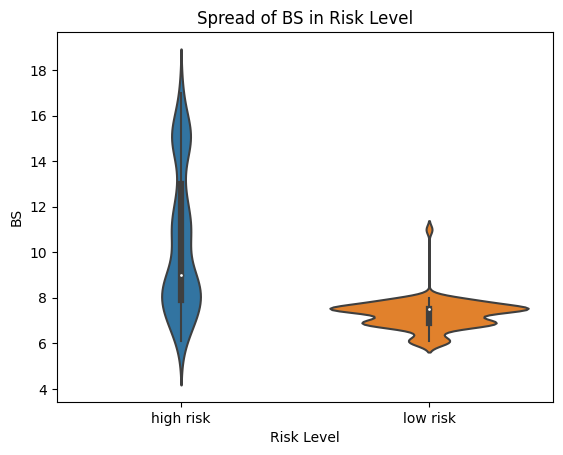

In [20]:
sns.violinplot(x="RiskLevel", y="BS", data=df)
plt.xlabel('Risk Level')
plt.ylabel('BS')
plt.title('Spread of BS in Risk Level')
plt.show()

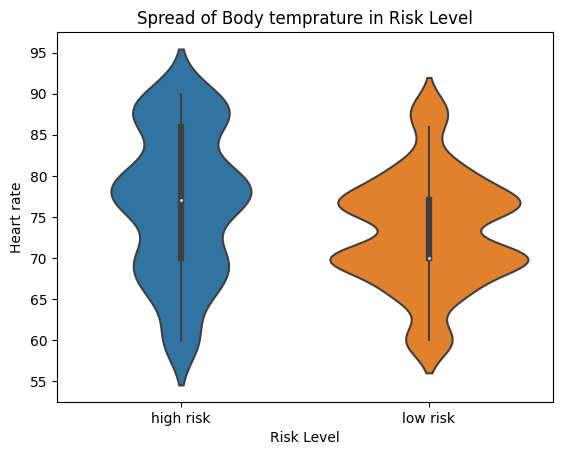

In [21]:
sns.violinplot(x="RiskLevel", y="HeartRate", data=df)
plt.xlabel('Risk Level')
plt.ylabel('Heart rate')
plt.title('Spread of Body temprature in Risk Level')
plt.show()

## Univariate analysis

In [22]:
df_highrisk = df.where(df['RiskLevel'] == 'high risk').dropna()
df_highrisk.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25.0,130.0,80.0,15.00,98.0,86.0,high risk
1,35.0,140.0,90.0,13.00,98.0,70.0,high risk
2,29.0,90.0,70.0,8.00,98.0,80.0,high risk
3,30.0,140.0,85.0,7.00,98.0,70.0,high risk
5,23.0,140.0,80.0,7.01,98.0,70.0,high risk


In [23]:
df_lowrisk = df.where(df['RiskLevel'] == 'low risk').dropna()
df_lowrisk.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
4,35.000000,120.0,60.0,6.10,98.0,76.0,low risk
8,23.000000,90.0,60.0,7.01,98.0,76.0,low risk
10,25.000000,110.0,89.0,7.01,98.0,77.0,low risk
11,30.585396,120.0,80.0,7.01,98.0,70.0,low risk
14,30.585396,70.0,50.0,6.90,98.0,70.0,low risk


In [24]:
df_midrisk = df.where(df['RiskLevel'] == 'mid risk').dropna()
df_midrisk.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel


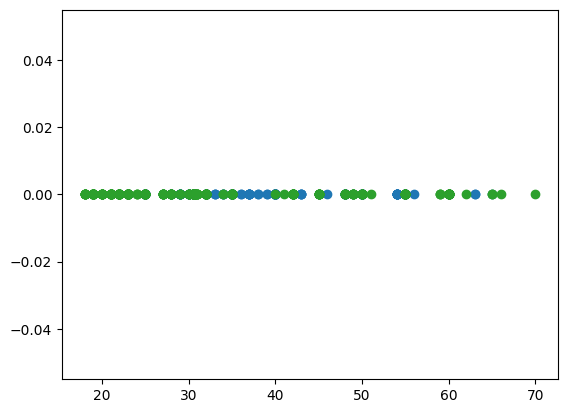

In [25]:
plt.plot(df_highrisk['Age'] , np.zeros_like(df_highrisk['Age']) , 'o')
plt.plot(df_midrisk['Age'] , np.zeros_like(df_midrisk['Age']) , 'o')
plt.plot(df_lowrisk['Age'] , np.zeros_like(df_lowrisk['Age']) , 'o')
plt.show()

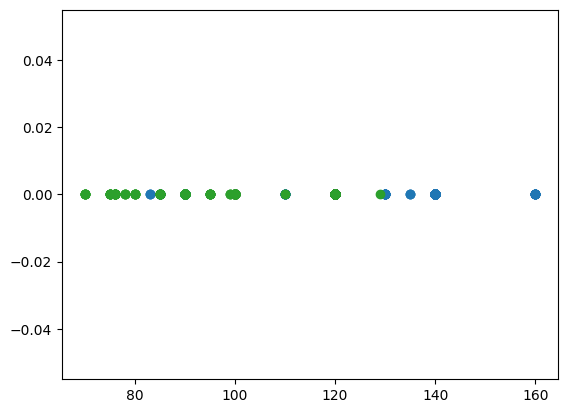

In [26]:
plt.plot(df_highrisk['SystolicBP'] , np.zeros_like(df_highrisk['SystolicBP']), 'o')
plt.plot(df_midrisk['SystolicBP'] , np.zeros_like(df_midrisk['SystolicBP']), 'o')
plt.plot(df_lowrisk['SystolicBP'] , np.zeros_like(df_lowrisk['SystolicBP']) , 'o')
plt.show()

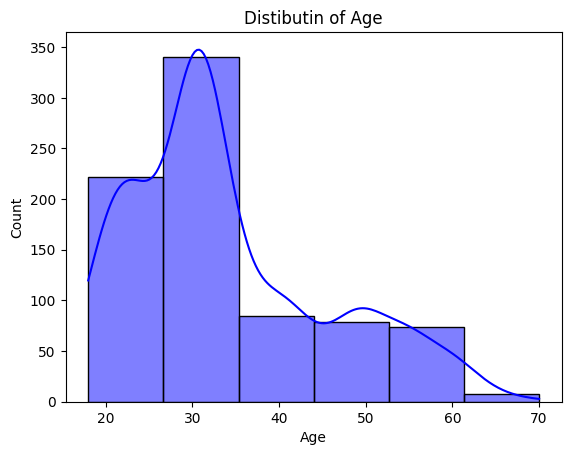

In [27]:
sns.histplot(df['Age'], bins=6, kde=True, color='blue', edgecolor='k')
plt.title('Distibutin of Age')
plt.show()

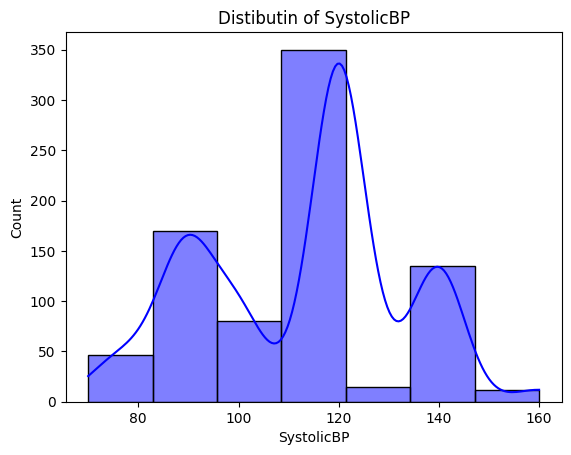

In [28]:
sns.histplot(df['SystolicBP'], bins=7, kde=True, color='blue', edgecolor='k')
plt.title('Distibutin of SystolicBP')
plt.show()

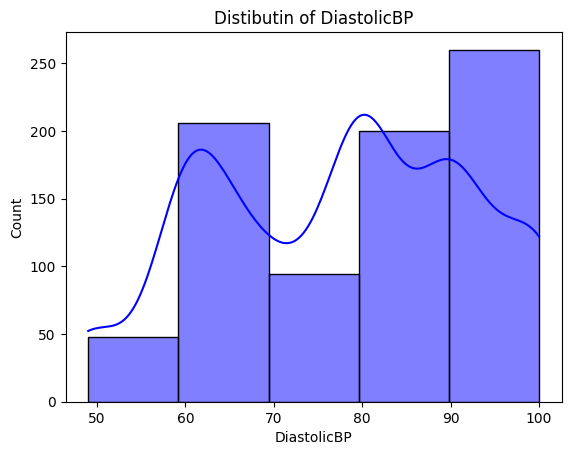

In [29]:
sns.histplot(df['DiastolicBP'], bins=5, kde=True, color='blue', edgecolor='k')
plt.title('Distibutin of DiastolicBP')
plt.show()

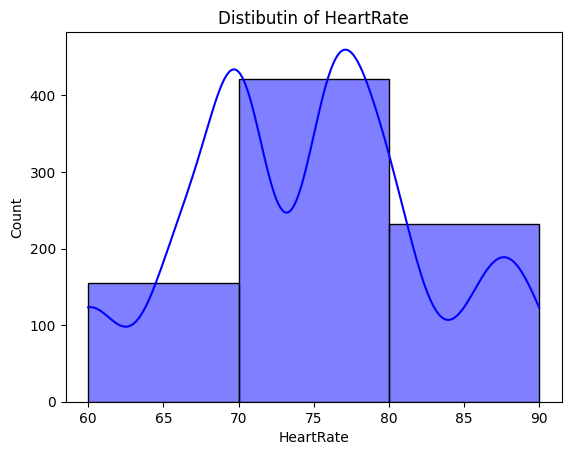

In [30]:
sns.histplot(df['HeartRate'], bins=3, kde=True, color='blue', edgecolor='k')
plt.title('Distibutin of HeartRate')
plt.show()

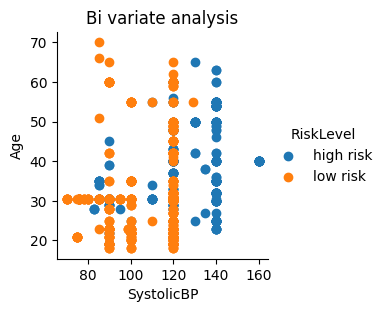

In [31]:
sns.FacetGrid(df, hue = "RiskLevel").map(plt.scatter , "SystolicBP" , "Age" ).add_legend();
plt.title('Bi variate analysis')
plt.show()

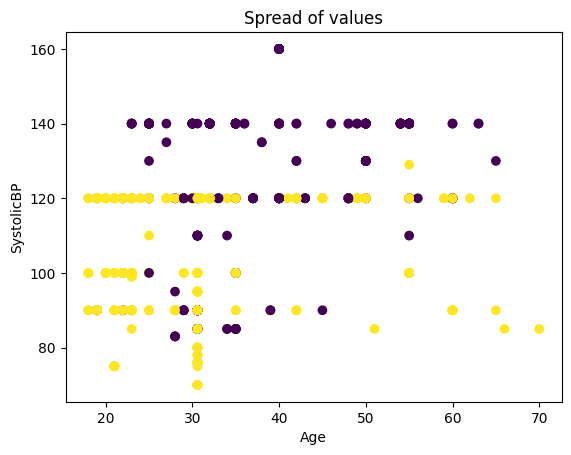

In [32]:
df['RiskLevel'] = scaler.fit_transform(df['RiskLevel'])
plt.scatter(data=df, x='Age', y='SystolicBP', c = 'RiskLevel')
plt.xlabel('Age')
plt.ylabel('SystolicBP')
plt.title('Spread of values')
plt.show()

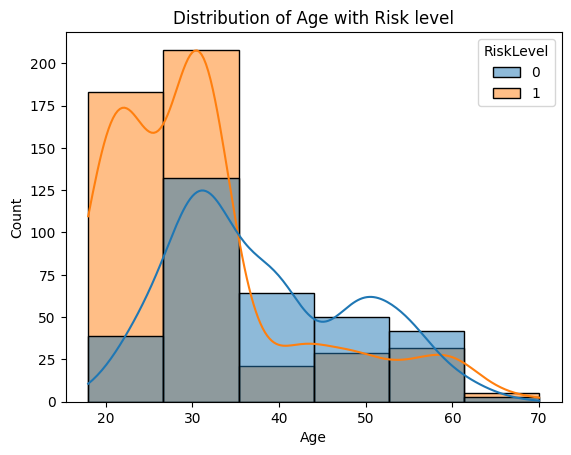

In [33]:
sns.histplot(data=df, x='Age', hue='RiskLevel', kde=True , bins = 6)
plt.title('Distribution of Age with Risk level')
plt.show()

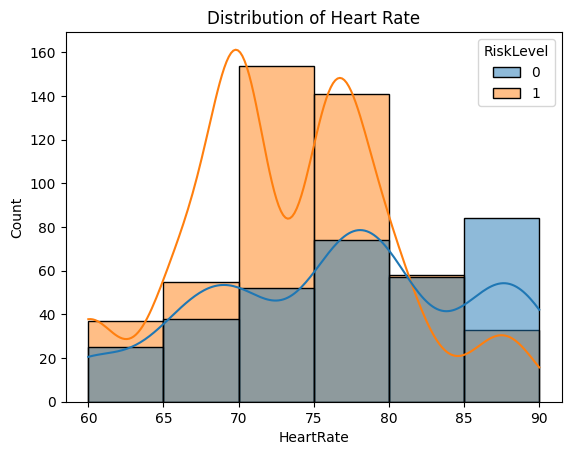

In [34]:
sns.histplot(data=df, x='HeartRate', hue='RiskLevel', kde=True , bins = 6)
plt.title('Distribution of Heart Rate')
plt.show()

## Multi variate analysis

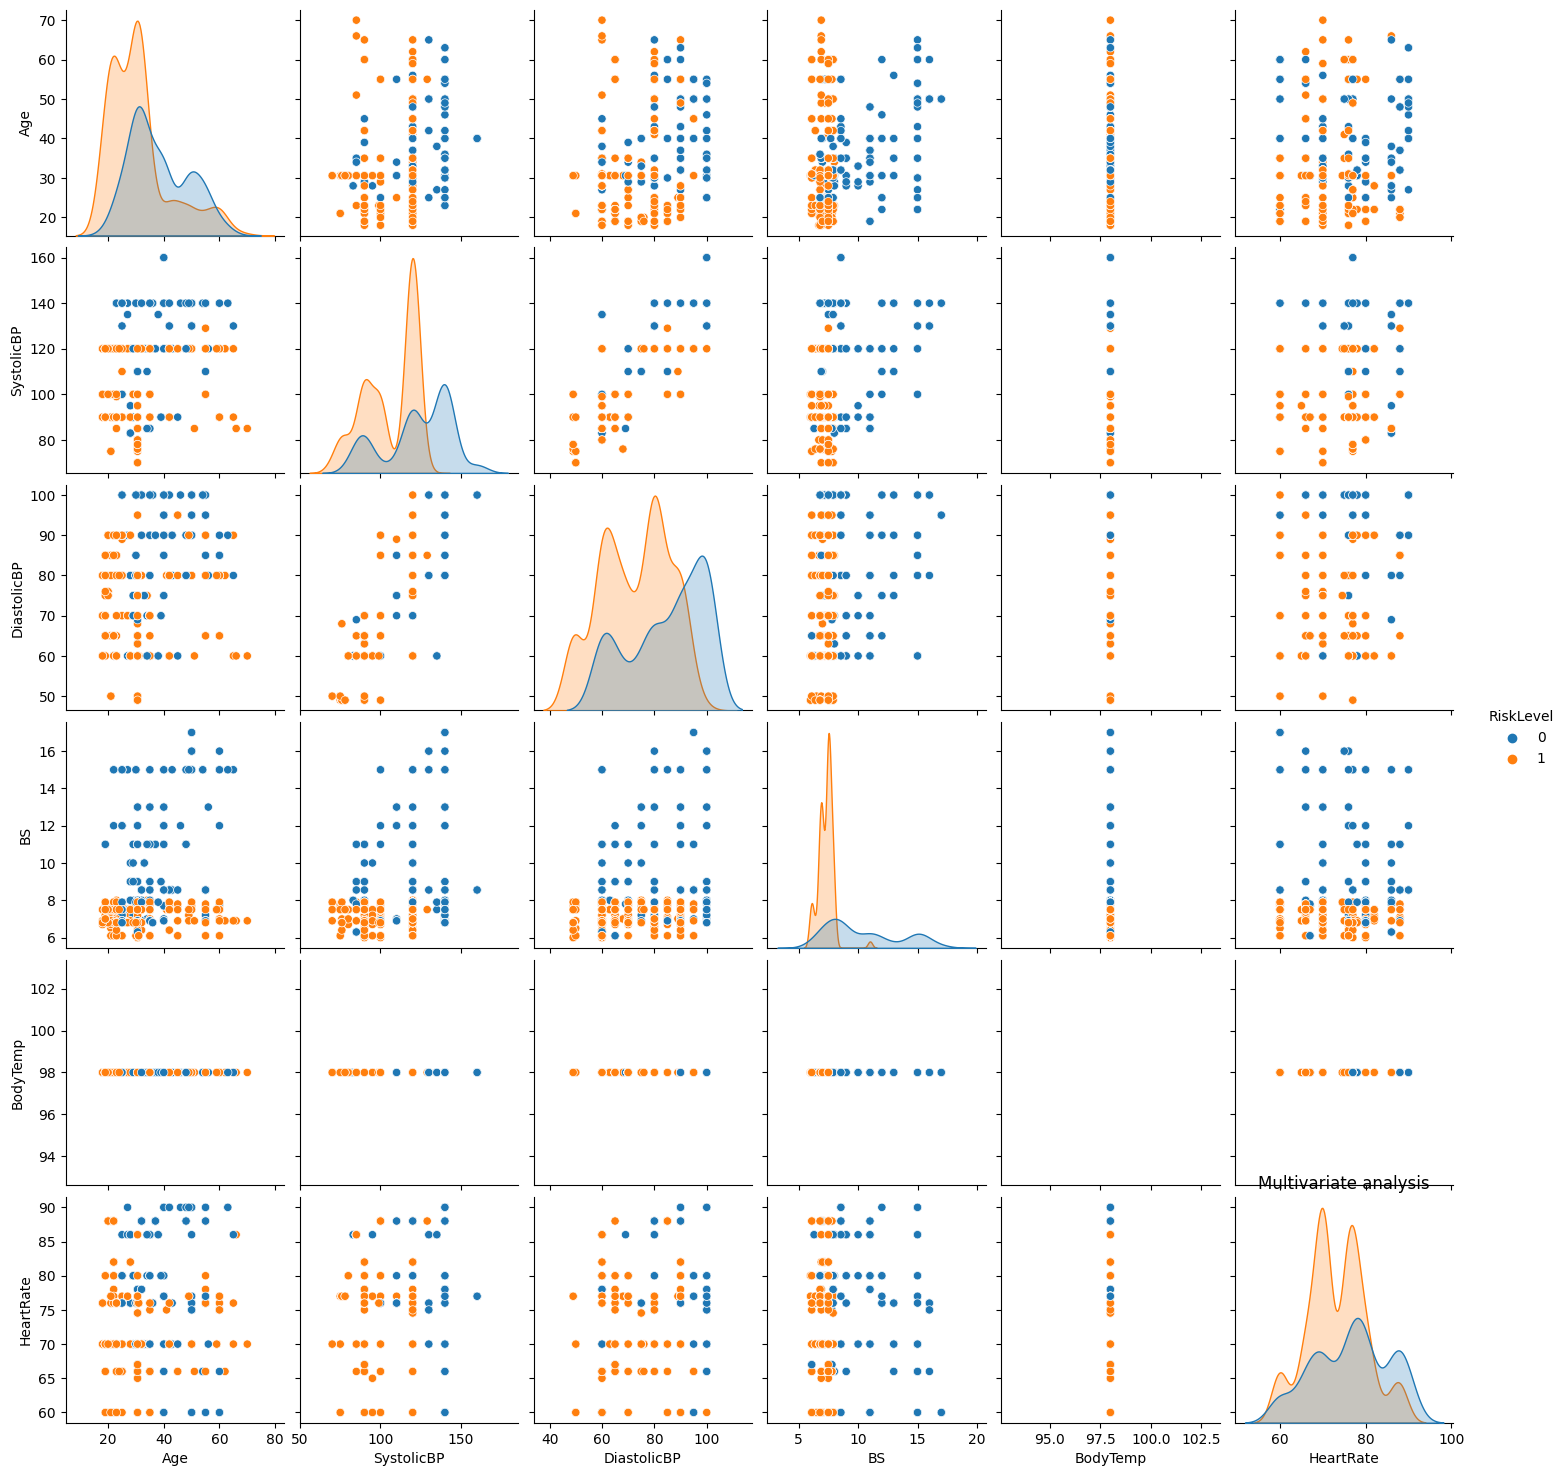

In [35]:
sns.pairplot(df , hue = 'RiskLevel')
plt.title('Multivariate analysis')
plt.show()

# Classification

In [36]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score , classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

X_train , X_test , y_train , y_test = train_test_split(df.drop('RiskLevel' , axis = 1) , df['RiskLevel'] , test_size=0.3, random_state=42)

print(f'X train : {X_train.shape}')
print(f'X test : {X_test.shape}')
print(f'Y train : {y_train.shape}')
print(f'Y test : {y_test.shape}')

X train : (565, 6)
X test : (243, 6)
Y train : (565,)
Y test : (243,)


In [37]:
print('DecisionTreeClassifier:')
model_dec = DecisionTreeClassifier(random_state = 42)
model_dec.fit(X_train , y_train)

y_predict = model_dec.predict(X_test)

accuracy = accuracy_score(y_predict , y_test)
print(f'Accuracy : {accuracy:.2f}')

print(classification_report(y_test , y_predict))

DecisionTreeClassifier:
Accuracy : 0.96
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       104
           1       0.99      0.95      0.97       139

    accuracy                           0.96       243
   macro avg       0.96      0.97      0.96       243
weighted avg       0.96      0.96      0.96       243



In [38]:
print('RandomForestClassifier:')
model = RandomForestClassifier(random_state = 42)
model.fit(X_train , y_train)

y_predict = model.predict(X_test)

accuracy = accuracy_score(y_predict , y_test)
print(f'Accuracy : {accuracy:.2f}')

print(classification_report(y_test , y_predict))

RandomForestClassifier:
Accuracy : 0.96
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       104
           1       0.99      0.95      0.97       139

    accuracy                           0.96       243
   macro avg       0.96      0.97      0.96       243
weighted avg       0.96      0.96      0.96       243



In [39]:
print('SVC:')
model_svc = SVC(kernel='rbf', C=1.0, random_state=42)
model_svc.fit(X_train , y_train)

y_predict = model_svc.predict(X_test)

accuracy = accuracy_score(y_predict , y_test)
print(f'Accuracy : {accuracy:.2f}')

print(classification_report(y_test , y_predict))

SVC:
Accuracy : 0.85
              precision    recall  f1-score   support

           0       0.97      0.67      0.80       104
           1       0.80      0.99      0.88       139

    accuracy                           0.85       243
   macro avg       0.89      0.83      0.84       243
weighted avg       0.87      0.85      0.85       243



In [40]:
print('KNeighborsClassifier:')
model_knn = KNeighborsClassifier(n_neighbors=3)
model_knn.fit(X_train , y_train)

y_predict = model_knn.predict(X_test)

accuracy = accuracy_score(y_predict , y_test)
print(f'Accuracy : {accuracy:.2f}')

print(classification_report(y_test , y_predict))

KNeighborsClassifier:
Accuracy : 0.89
              precision    recall  f1-score   support

           0       0.91      0.84      0.87       104
           1       0.88      0.94      0.91       139

    accuracy                           0.89       243
   macro avg       0.90      0.89      0.89       243
weighted avg       0.89      0.89      0.89       243

